## **Part 1. Import Libraries**

In [232]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [190]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00


In [191]:
from pmdarima import auto_arima

## **Part 2. Upload Data**

In [175]:
uploaded = files.upload() #TrainingData #Years2010to2022

Saving Google_Stock_Train (2010-2022).csv to Google_Stock_Train (2010-2022) (2).csv


In [176]:
data = pd.read_csv("Google_Stock_Train (2010-2022).csv")
data.shape

(3272, 7)

## **Part 3. EDA**


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [178]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
5,2010-01-11,15.126627,15.126627,14.865866,15.042793,15.042793,288227484
6,2010-01-12,14.956206,14.968969,14.714715,14.776777,14.776777,193937868
7,2010-01-13,14.426677,14.724224,14.361862,14.691942,14.691942,259604136
8,2010-01-14,14.612112,14.869870,14.584835,14.761011,14.761011,169434396
9,2010-01-15,14.848348,14.853854,14.465465,14.514515,14.514515,217162620


In [115]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3262,2022-12-16,90.760002,91.330002,89.519997,90.260002,90.260002,58011800
3263,2022-12-19,90.260002,90.559998,88.209999,88.440002,88.440002,29493000
3264,2022-12-20,88.110001,89.180000,87.440002,89.019997,89.019997,23453800
3265,2022-12-21,89.080002,90.220001,88.320000,89.580002,89.580002,24745600
3266,2022-12-22,88.160004,88.540001,86.320000,87.760002,87.760002,27658300
3267,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
3268,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
3269,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
3270,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500
3271,2022-12-30,86.980003,88.300003,86.570000,88.230003,88.230003,23986300


In [116]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3272.000000,3272.000000,3272.000000,3272.000000,3272.000000,3.272000e+03
mean,49.161187,49.650301,48.653316,49.160898,49.160898,6.017541e+07
std,35.810449,36.216443,35.387644,35.804094,35.804094,4.957609e+07
min,10.968719,11.068068,10.851602,10.912663,10.912663,9.312000e+06
25%,20.281718,20.426113,20.172359,20.295858,20.295858,2.894200e+07
50%,38.527750,38.931249,38.224501,38.563002,38.563002,4.123200e+07
75%,61.837625,62.265000,61.218125,61.738001,61.738001,7.927251e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08


In [117]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [118]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## **Part 4. Data Cleanup**

In [119]:
missing_values = data.isnull().sum()
duplicated = data.duplicated()

print(missing_values)
print(duplicated)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
0       False
1       False
2       False
3       False
4       False
        ...  
3267    False
3268    False
3269    False
3270    False
3271    False
Length: 3272, dtype: bool


In [120]:
cleandata = data.dropna(axis = 1)
cleandata = cleandata.dropna(axis=0)
cleandata = cleandata.drop_duplicates()

print(cleandata.shape)

(3272, 7)


## **Part 5. DataViz**

In [121]:
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year

In [122]:
#Calculate the avg Highest/ avg Lowest stock price per year (2010-2022)
avg_yearlyH = data.groupby("Year")["High"].mean()
avg_yearlyL = data.groupby("Year")["Low"].mean()

for year in range(2010,2023):
  avgHigh = avg_yearlyH.get(year,0)
  avgLow = avg_yearlyL.loc[year]
  print(year,avgHigh, avgLow)

2010 13.53724161111111 13.28298142063492
2011 14.37351540079365 14.104312626984127
2012 16.223136176 15.939817852000001
2013 22.275741 21.96477621825397
2014 28.642101734126985 28.167980603174602
2015 31.28467858730159 30.69791066666667
2016 38.47044042063492 37.84813482936508
2017 47.260866617529885 46.66088046613546
2018 56.74817344223108 55.46726888446215
2019 59.985837345238096 59.062902880952386
2020 74.83170739130435 72.98030428063241
2021 125.25533550793651 123.03388114285714
2022 116.48381297609562 113.20106387649403


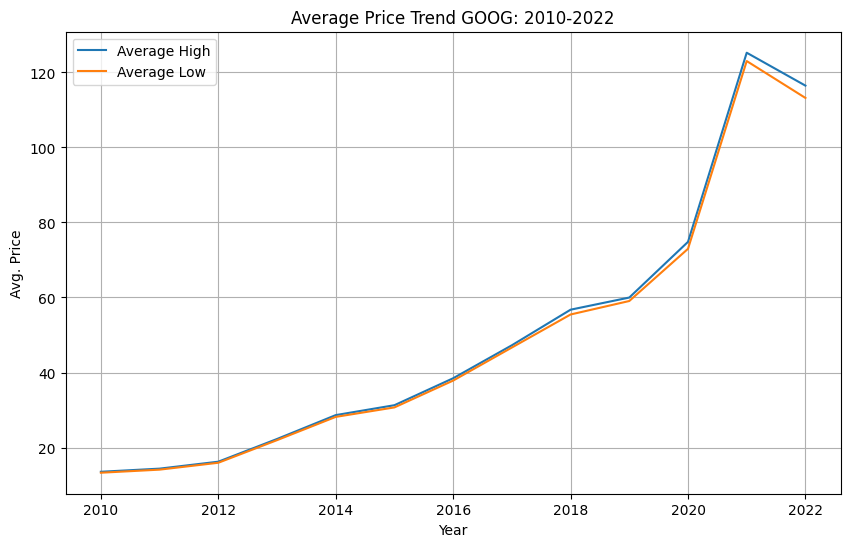

In [123]:
plt.figure(figsize =(10,6))
plt.plot(avg_yearlyH.index, avg_yearlyH, label = "Average High")
plt.plot(avg_yearlyL.index, avg_yearlyL, label = "Average Low")
plt.xlabel("Year")
plt.ylabel("Avg. Price")
plt.title("Average Price Trend GOOG: 2010-2022")
plt.legend()
plt.grid(True)
plt.show()

In [124]:
#Calculate the avg Volume per year (2010-2022)
avg_yearlyV = data.groupby("Year")["Volume"].mean()
for year in range(2010,2023):
  avgVol = avg_yearlyV.get(year,0)
  print(year,avgVol)

2010 127069010.14285715
2011 123005664.85714285
2012 104070817.008
2013 83412535.71428572
2014 53328169.61904762
2015 43396365.07936508
2016 39381277.777777776
2017 32342717.131474104
2018 40919314.74103586
2019 30260753.968253966
2020 39953114.62450593
2021 30513936.507936507
2022 34767530.27888446


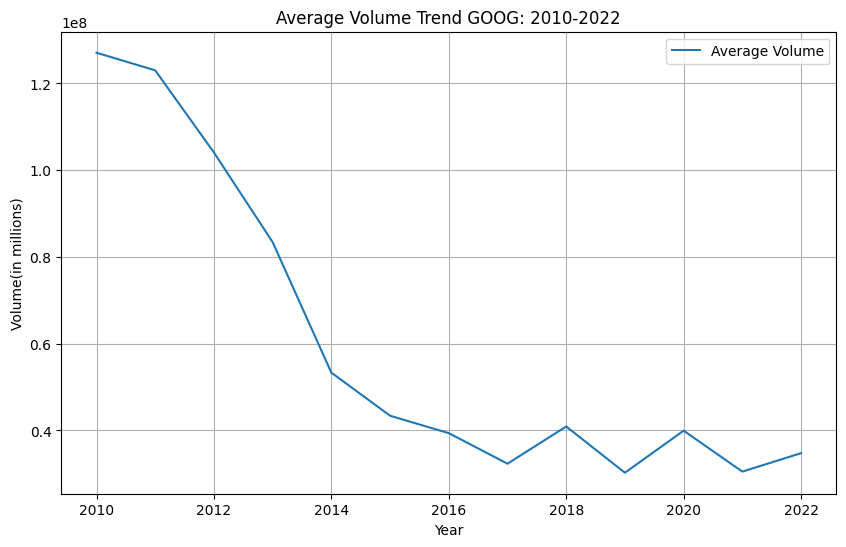

In [125]:
plt.figure(figsize =(10,6))
plt.plot(avg_yearlyV.index, avg_yearlyV, label = "Average Volume", )
plt.xlabel("Year")
plt.ylabel("Volume(in millions)")
plt.title("Average Volume Trend GOOG: 2010-2022")
plt.legend()
plt.grid(True)
plt.show()

## Part 6. Correlation Study

In [126]:
#Calculate the avg Price Change per year (2010-2022)
data["Price_Change"] = data["Close"] - data["Open"]
avg_yearlyPC = data.groupby("Year")["Price_Change"].mean()

for year in range(2010,2023):
  avgVol = avg_yearlyV.get(year,0)
  avgPC = avg_yearlyPC.loc[year]
  print(f"Year{year}: Volume{avgVol:.2f}: PriceChange{avgPC:.2f}")

Year2010: Volume127069010.14: PriceChange-0.02
Year2011: Volume123005664.86: PriceChange-0.00
Year2012: Volume104070817.01: PriceChange0.00
Year2013: Volume83412535.71: PriceChange0.02
Year2014: Volume53328169.62: PriceChange-0.04
Year2015: Volume43396365.08: PriceChange-0.00
Year2016: Volume39381277.78: PriceChange-0.02
Year2017: Volume32342717.13: PriceChange0.02
Year2018: Volume40919314.74: PriceChange-0.03
Year2019: Volume30260753.97: PriceChange0.05
Year2020: Volume39953114.62: PriceChange0.07
Year2021: Volume30513936.51: PriceChange0.08
Year2022: Volume34767530.28: PriceChange-0.12


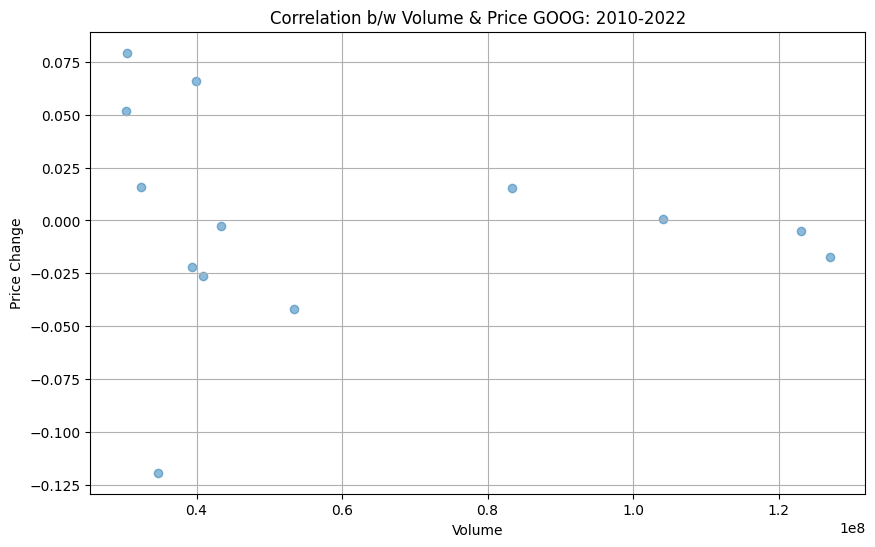

In [127]:
plt.figure(figsize =(10,6))
plt.scatter(avg_yearlyV,avg_yearlyPC,alpha = 0.5)
plt.xlabel("Volume")
plt.ylabel("Price Change")
plt.title("Correlation b/w Volume & Price GOOG: 2010-2022")
plt.grid(True)
plt.show()

## **Part 7. Movering Averages**

In [100]:
uploaded = files.upload() #TestData #Year2023

Saving Google_Stock_Test (2023).csv to Google_Stock_Test (2023) (1).csv


In [161]:
data2 = pd.read_csv("Google_Stock_Test (2023).csv")
data2.shape

(143, 7)

In [163]:
data2.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
5,2023-01-10,85.980003,88.669998,85.830002,88.419998,88.419998,30467800
6,2023-01-11,89.180000,91.599998,89.010002,91.519997,91.519997,26862000
7,2023-01-12,91.480003,91.870003,89.750000,91.129997,91.129997,30258100
8,2023-01-13,90.849998,92.190002,90.129997,92.120003,92.120003,26329200
9,2023-01-17,92.059998,92.250000,90.050003,91.290001,91.290001,32602400


In [165]:
data2.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
133,2023-07-17,125.940002,127.099998,124.199997,124.650002,124.650002,25716200
134,2023-07-18,124.599998,124.680000,122.959999,123.760002,123.760002,26226400
135,2023-07-19,124.599998,125.180000,121.800003,122.029999,122.029999,37224000
136,2023-07-20,121.419998,124.089996,118.220001,119.199997,119.199997,37906800
137,2023-07-21,120.620003,120.989998,118.730003,120.019997,120.019997,72937900
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100
142,2023-07-28,130.779999,133.740005,130.570007,132.580002,132.580002,36572900


In [180]:
data2["Date"] = pd.to_datetime(data2["Date"])

In [181]:
#Calculating Moving Average
days = 100
data2["100 Day Moving AVG"] = data2["Close"].rolling(window=days).mean()
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,100 Day Moving AVG,Price_Change,Volatility,Rolling Mean,Upper BB,Lower BB
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200,NaN,-0.469993,NaN,NaN,NaN,NaN
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800,NaN,-2.269996,NaN,NaN,NaN,NaN
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400,NaN,-1.270004,NaN,NaN,NaN,NaN
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500,NaN,0.549995,NaN,NaN,NaN,NaN
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900,NaN,-0.340004,NaN,NaN,NaN,NaN


In [168]:
data2.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,100 Day Moving AVG
133,2023-07-17,125.940002,127.099998,124.199997,124.650002,124.650002,25716200,110.5172
134,2023-07-18,124.599998,124.680000,122.959999,123.760002,123.760002,26226400,110.8383
135,2023-07-19,124.599998,125.180000,121.800003,122.029999,122.029999,37224000,111.1497
136,2023-07-20,121.419998,124.089996,118.220001,119.199997,119.199997,37906800,111.4504
137,2023-07-21,120.620003,120.989998,118.730003,120.019997,120.019997,72937900,111.7519
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100,112.0666
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600,112.3851
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100,112.7578
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100,113.1153
142,2023-07-28,130.779999,133.740005,130.570007,132.580002,132.580002,36572900,113.4898


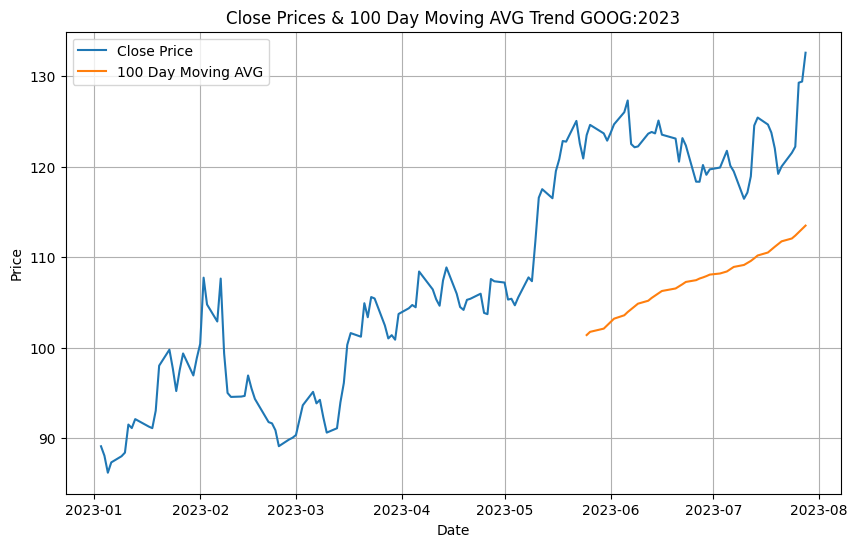

In [169]:
plt.figure(figsize =(10,6))
plt.plot(data2["Date"], data2["Close"], label = "Close Price" )
plt.plot(data2["Date"], data2["100 Day Moving AVG"], label = "100 Day Moving AVG" )
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Close Prices & 100 Day Moving AVG Trend GOOG:2023")
plt.legend()
plt.grid(True)
plt.show()

## **Part 8. Visualising Volatilty**

In [182]:
volatilty_days = 20
data2["Date"] = pd.to_datetime(data2["Date"])
data2["Price_Change"] = data2["Close"] - data2["Open"]
data2["Volatility"] = data2["Price_Change"].rolling(window=volatilty_days).std()

In [184]:
data2["Rolling Mean"] = data2["Close"].rolling(window=volatilty_days).mean()

In [185]:
data2["Upper BB"] = data2["Rolling Mean"]+ 2 * data2["Volatility"]
data2["Lower BB"] = data2["Rolling Mean"]- 2 * data2["Volatility"]

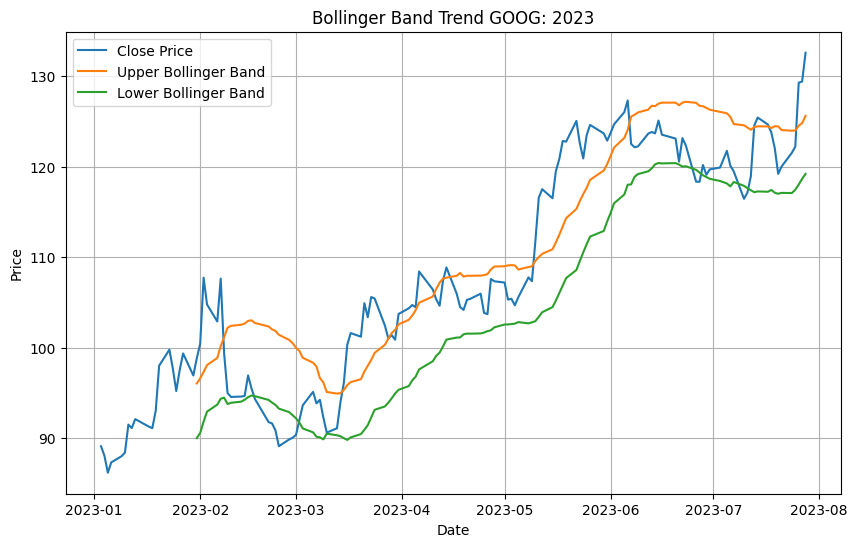

In [186]:
plt.figure(figsize =(10,6))
plt.plot(data2["Date"], data2["Close"], label = "Close Price" )
plt.plot(data2["Date"], data2["Upper BB"], label = "Upper Bollinger Band" )
plt.plot(data2["Date"], data2["Lower BB"], label = "Lower Bollinger Band" )
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bollinger Band Trend GOOG: 2023")
plt.legend()
plt.grid(True)
plt.show()

## **Part 9. ARIMA Modeling**

In [200]:
#data.set_index("Date", inplace=True)
data.head() #TrainingData

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [206]:
model = auto_arima(data["Close"],seasonal = False,stepwise=True, suppress_warning = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10064.140, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10077.089, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10067.682, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10067.558, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10076.352, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10064.212, Time=2.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10064.111, Time=4.82 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10063.221, Time=2.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10069.420, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10069.618, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10063.125, Time=1.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10066.992, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10067.104, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10064.059, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0

In [207]:
p,d,q = model.order
print(f"Optimal p value:{p}, d value:{d}, q value:{q}")

Optimal p value:1, d value:1, q value:1


## **Part 10. Forecasting & Residual Analysis**

In [214]:
model = ARIMA(data["Close"],order =(p,d,q))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [215]:
#Forecasting future prices

forecast_steps = 3
forecast, stderr, conf_int = results.forecast(steps= forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [216]:
print("Forecasted Future Stock price is "+ " " + str(forecast))

Forecasted Future Stock price is  88.2466574004096


In [217]:
residuals = data["Close"] - results.fittedvalues


ACF Plot for Residuals


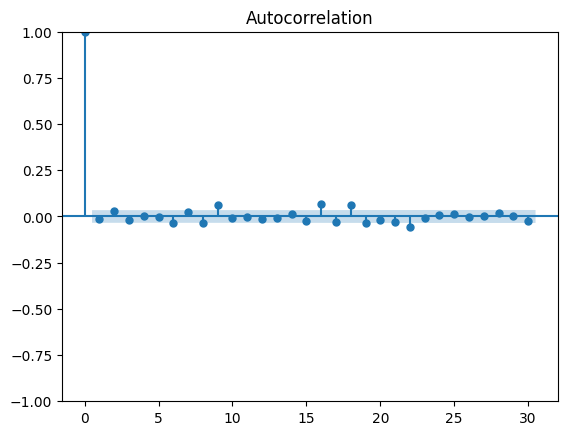

In [221]:
print("ACF Plot for Residuals")
plot_acf(residuals, lags = 30);

PACF Plot for Residuals


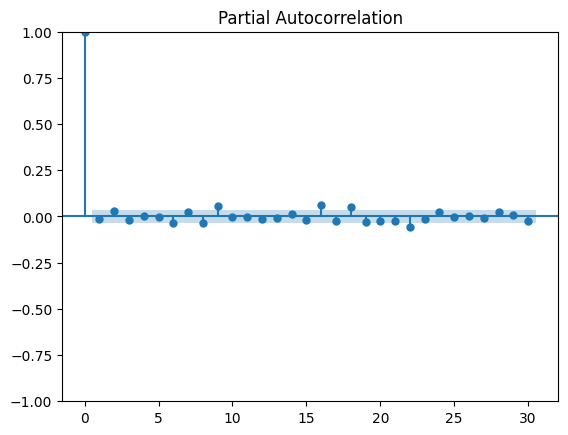

In [222]:
print("PACF Plot for Residuals")
plot_pacf(residuals, lags = 30);

## **Part 11. Model Evaluation**

In [223]:
actualdata = data["Close"].iloc[-forecast_steps:]

In [229]:
#Mean Absolute Error
mae = np.mean(np.abs(actualdata-forecast))
print(mae)

0.8155514668031998


In [230]:
#Mean Squared Error
mse = np.mean((actualdata-forecast)**2)
print(mse)

1.6665469668556077


In [231]:
#Root Mean Squared Error
rmse = np.sqrt(mse)
print(rmse)

1.290948088365914
